In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as spio
from scipy.stats import multivariate_normal
% matplotlib notebook

In [2]:
# load in test image and ground truth. Your goal is to segment this image to recover the ground truth
im = plt.imread('bob_small.jpeg')

In [3]:
gt = spio.loadmat('bob_GroundTruth_small.mat', squeeze_me=True)['gt']

<IPython.core.display.Javascript object>


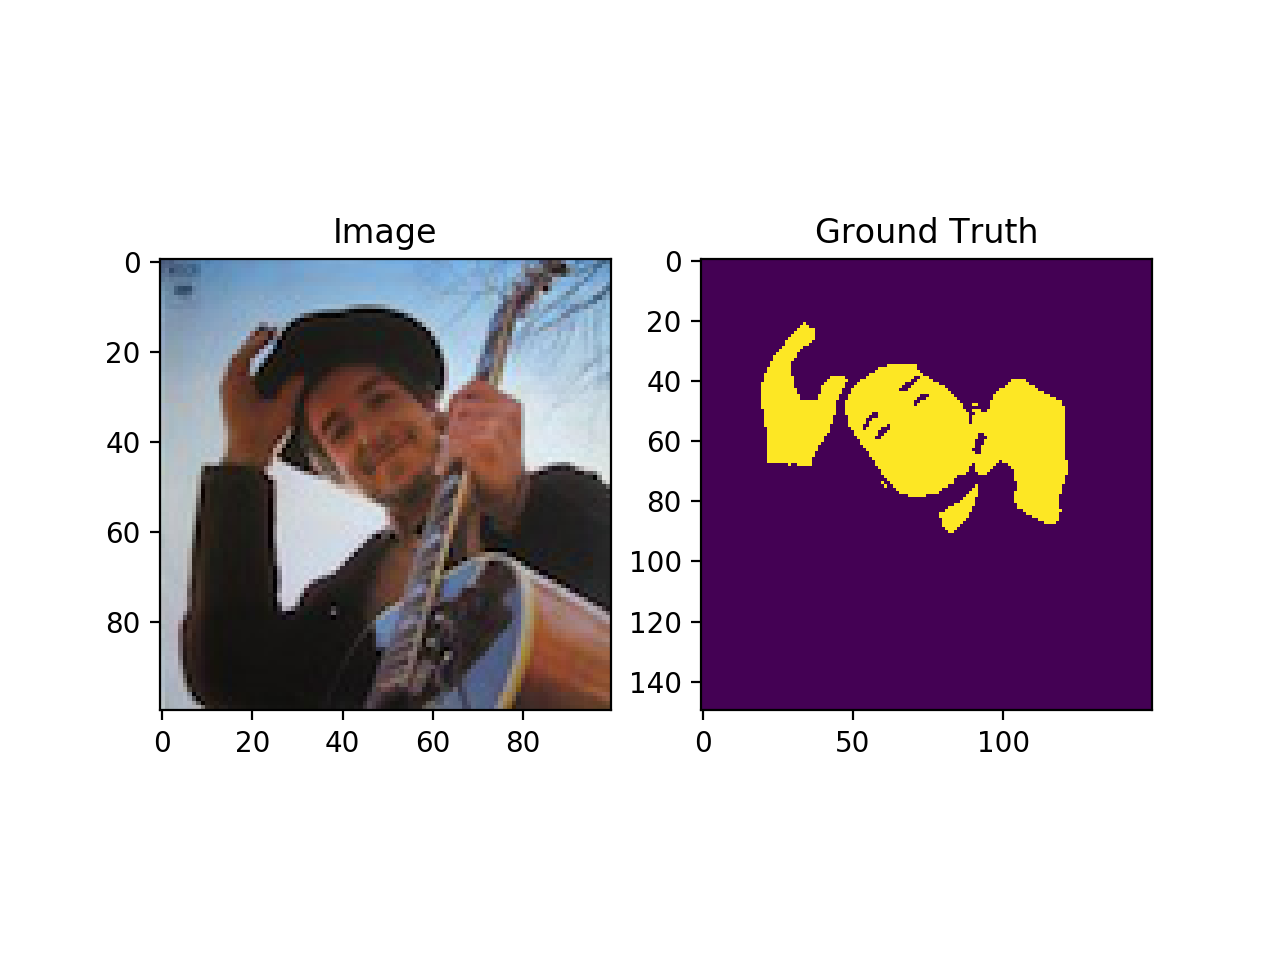

Text(0.5,1,'Ground Truth')

In [4]:
# display test image and ground truth
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im)
ax1.set_title('Image')
ax2.imshow(gt)
ax2.set_title('Ground Truth')

<IPython.core.display.Javascript object>


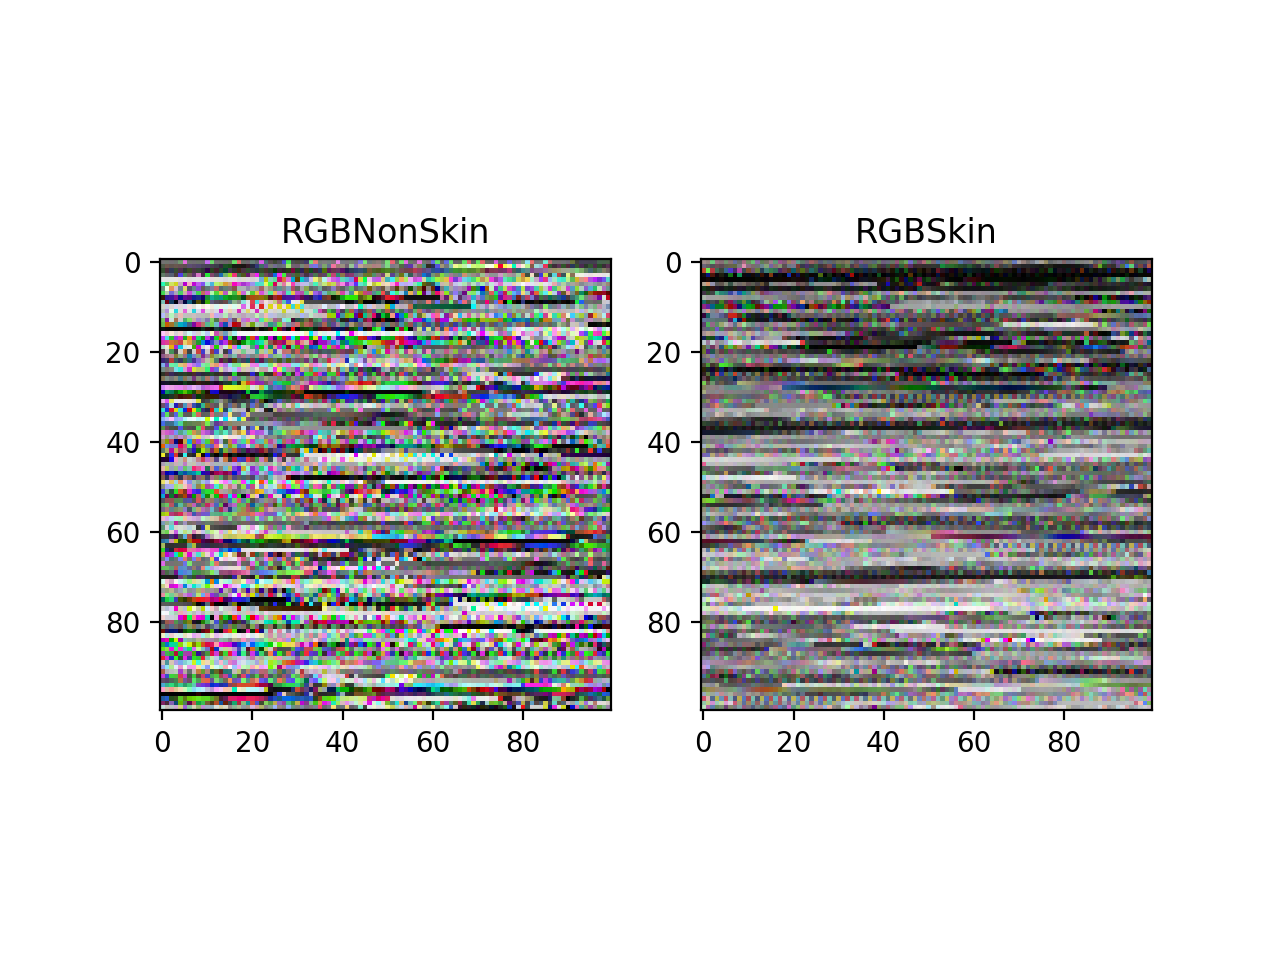

Text(0.5,1,'RGBSkin')

In [5]:
# Load in training data - contains two variables each of size 3 x 10000
# Each column contains RGB values from one pixel in training data

trainingData = spio.loadmat('RGBSkinNonSkin.mat', squeeze_me=True)
RGBNonSkin = np.float32(trainingData['RGBNonSkin'])
RGBSkin = np.float32(trainingData['RGBSkin'])

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(RGBNonSkin.reshape(100, 100, 3))
ax1.set_title('RGBNonSkin')
ax2.imshow(RGBSkin.reshape(100, 100, 3))
ax2.set_title('RGBSkin')

In [6]:
# the goal of this routine is to return the mean and covariance of a set of
# multidimensaional data.  It is assumed that each column of the 2D array
# data contains a single data point.  The mean vector should be a 3x1 vector
# with the mean RGB value.  The covariance should be a 3x3 covariance
# matrix.

def fitGaussianModel(data): # data shape: (3, 10000)
    meanData = np.mean(data, 1)
    covData = np.cov(data)
    return meanData,covData

In [7]:
meanSkin, covSkin = fitGaussianModel(RGBSkin) # fit Gaussian model for skin data

meanNonSkin, covNonSkin = fitGaussianModel(RGBNonSkin) # fit Gaussian model for non-skin data

In [8]:
# the goal of this routine is to evaluate a Gaussian likelihood

def calcGaussianProb(data, gaussMean, gaussCov):
    like = multivariate_normal.pdf(data.ravel(), gaussMean, gaussCov)
    return like

In [9]:
# let's define priors for whether the pixel is skin or non skin
priorSkin = 0.3;
priorNonSkin = 0.7;

# now run through the pixels in the image and classify them as being skin or
# non skin - we will fill in the posterior
imY, imX, imZ = im.shape
posteriorSkin = np.zeros([imY, imX])

for cY in range(imY): 
    for cX in range(imX):
        # extract this pixel data
        
        thisPixelData = np.double(im[cY, cX, :])
        thisPixelData = thisPixelData[:, np.newaxis]
        
        # calculate likelihood of this data given skin model
        
        likeSkin = calcGaussianProb(thisPixelData, meanSkin, covSkin)
        
        # calculate likelihood of this data given non skin model
        
        likeNonSkin = calcGaussianProb(thisPixelData, meanNonSkin, covNonSkin)
        
        # calculate posterior probability from likelihoods and priors using BAYES rule.
        
        posteriorSkin[cY,cX]= ((likeSkin * priorSkin) / (likeSkin * priorSkin + likeNonSkin * priorNonSkin))        

<IPython.core.display.Javascript object>


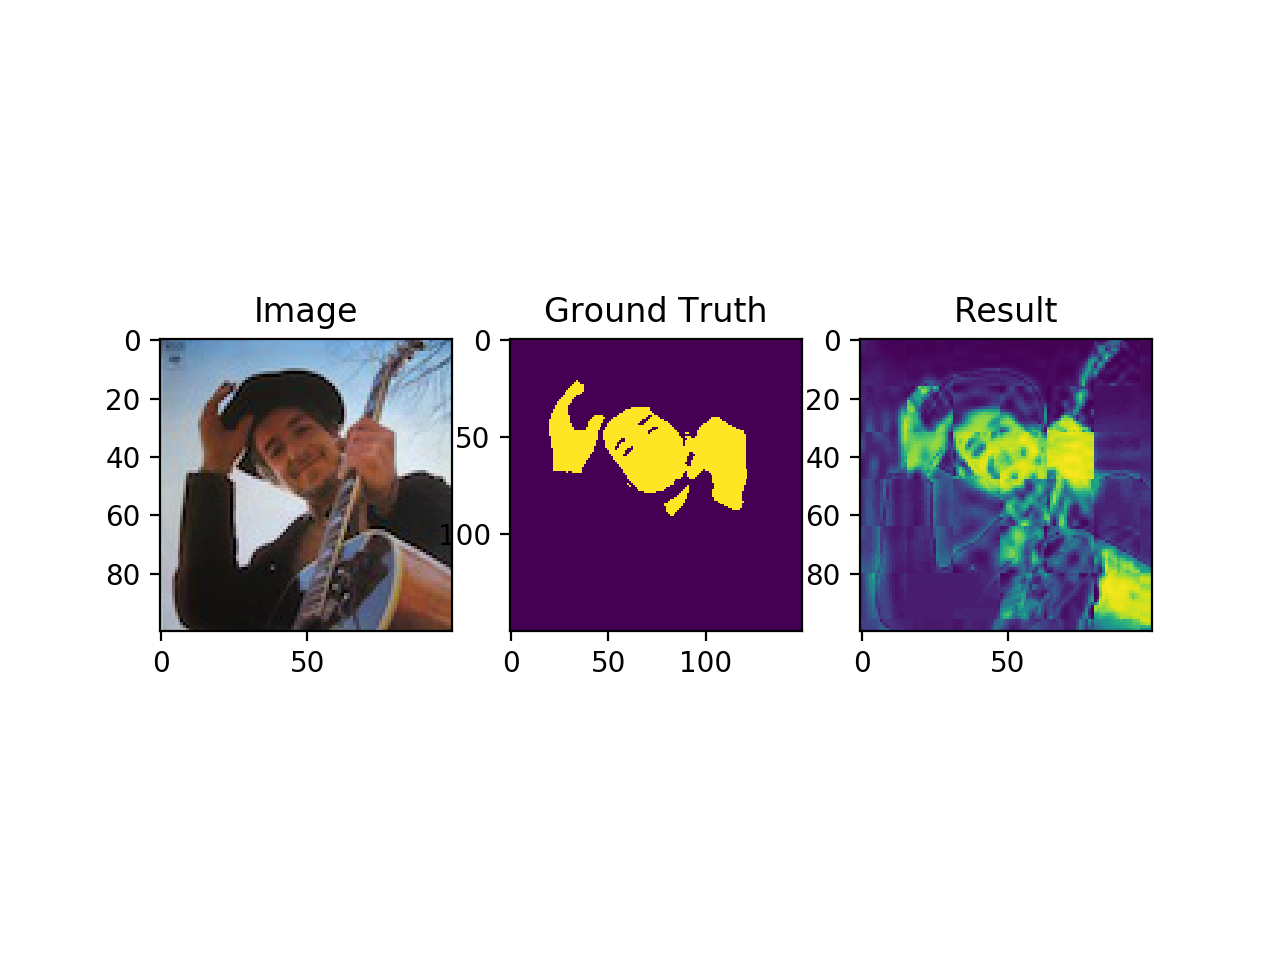

Text(0.5,1,'Result')

In [10]:
# display results;
# draw skin posterior
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(im)
ax1.set_title('Image')
ax2.imshow(gt)
ax2.set_title('Ground Truth')
ax3.imshow(posteriorSkin)
ax3.set_title('Result')